# Project 6 - The Classification Problem  
##### Author: Isaac Lee
##### Duration: 22/05/2021 - 04/06/2021



https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

# Project Aims
We have the above dataset and for each drug our aim is to classify whether or not someone has used that drug at some point in the past or if they've never been a user.
Interesting questions:
- Which features have sufficient correlation with drug use?
- Which features have the most importance?
- Are the same features relevant for all drugs?
- Which drugs are harder to predict?

# About the Data

In [70]:
# Description and source

## Todo List
    [*] Import & Explore Data
    [*] Feature Engineering
    [*] Decide and set out classification problem
    [*] Visualize Data
    [*] Decide on Models 3x
    [*] Onehot encoding + fix heatmap
    [*] Train Test Split
    [*] Implement Naive Bayes
    [*] Impliment XGBoost 
    
    [*] Impliment Random Forest 
    [*] Test & Cross Validate Sci-kit learn models
    [*] Properly Tune Parameters
    [*] Interpret findings
    [] Convert to Poster
    [] Research Theory for each model

# Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

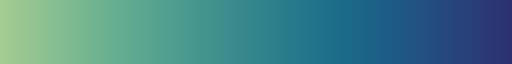

In [72]:
sns.set() # Setting seaborn as default style
sns.set_context("poster")
palette = 'crest'
sns.set_palette(palette)
cont_col = ['#6CB190', '#1D2562'] # when we need two contrasting colours
sns.color_palette(palette, as_cmap=True)

## Importing Data

In [73]:
df = pd.read_csv("drug_consumption.txt")

In [74]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [76]:
df.isnull().sum() # No null values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

## Drug Choice
To simplify the problem we will reduce our choice to a single drug and remove all the others.

In [77]:
drug = 'Heroin'
other_drugs = list(df.columns)[13:]
other_drugs.remove(drug)
df.drop(other_drugs, inplace=True, axis=1) # Removing other drugs

# Feature Engineering

### User Classes
- CL0: Never Used
- CL1: Used over a Decade Ago 
- CL2: Used in Last Decade 
- CL3: Used in Last Year 
- CL4: Used in Last Month 
- CL5: Used in Last Week 
- CL6: Used in Last Day

However for this project we combine the classes into:
Never Used: 0
Used: 1

In [78]:
df = df.replace(['CL0'], 0) # Never used
df = df.replace(['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], 1) # Used

In [79]:
df[drug].value_counts()

0    1605
1     280
Name: Heroin, dtype: int64

### Age (Real) 
Is age of participant and has one of the values:
* Original Label : New Label Meaning 
- -0.95197 : 0 18-24 
- -0.07854 : 1 25-34 
- 0.49788 :  2 35-44 
- 1.09449 :  3 45-54 
- 1.82213 :  4 55-64 
- 2.59171 :  5 65+ 

Descriptive statistics:
Min Max Mean Std.dev.
-0.95197 2.59171 0.03461 0.87813

In [80]:
df['Age'].value_counts()
df['Age'] = df['Age'].replace([-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171],
                              [0, 1, 2, 3, 4, 5]).astype(int)


### Gender (Real) 
Is gender of participant and has one of the values:
* Value | Meaning 
- 0.48246 : Female <- 0 
- -0.48246 : Male <- 1

Descriptive statistics
Min Max Mean Std.dev.
-0.48246 0.48246 -0.00026 0.48246

In [81]:
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace([0.48246, -0.48246], [0, 1]).astype(int)

### Education (Real) 
Is level of education of participant and has one of the values:
* Value | Meaning 
- -2.43591 Left school before 16 years 
- -1.73790 Left school at 16 years 
- -1.43719 Left school at 17 years 
- -1.22751 Left school at 18 years
- -0.61113 Some college or university, no certificate or degree 
- -0.05921 Professional certificate/ diploma 
- 0.45468 University degree 
- 1.16365 Masters degree 
- 1.98437 Doctorate degree 

Descriptive statistics
Min Max Mean Std.dev.
-2.43591 1.98437 -0.00379 0.95004

In [82]:
df['Education'].value_counts()

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64

We will combine into left school before 18 to get a bigger sample size and re-label for ease of interpretation.

In [83]:
df['Education'] = df['Education'].replace([-2.43591, -1.73790, -1.43719], -1.99548) # Combining
df['Education'] = df['Education'].replace([-1.99548, -1.22751, -0.61113, -0.05921, 0.45468, 1.16365, 1.98437],
                                          [0, 1, 2, 3, 4, 5, 6]).astype(int)

So now the revised Education data is:

- -1.99548 : 0 Left school before 18 years
- -1.22751 : 1 Left school at 18 years
- -0.61113 : 2 Some college or university, no certificate or degree 
- -0.05921 : 3 Professional certificate/ diploma 
- 0.45468  : 4 University degree 
- 1.16365  : 5 Masters degree 
- 1.98437  : 6 Doctorate degree 

### Country (Real) 
Is country of current residence of participant and has one of the values:
* Value | Meaning 
- -0.09765 Australia 
- 0.24923 Canada 
- -0.46841 New Zealand 
- -0.28519 Other 
- 0.21128 Republic of Ireland 
- 0.96082 UK 
- -0.57009 USA 

Descriptive statistics
Min Max Mean Std.dev.
-0.57009 0.96082 0.35554 0.70015

In [84]:
df['Country'].value_counts()

 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64

So clearly we have some countries very under represented, so we will combine as follows:
- 0 UK & Ireland 
- 1 New Zealand & Australia
- 2 USA & Canada
- 3 Other

In [85]:
df['Country'] = df['Country'].replace([0.96082, 0.21128, -0.46841, -0.09765, -0.57009, 0.24923, -0.28519],
                                     [0, 0, 1, 1, 2, 2, 3]).astype(int)

### Ethnicity (Real) 
Is ethnicity of participant and has one of the values:
* Value | Meaning 
- -0.50212 Asian 
- -1.10702 Black
- 1.90725 Mixed-Black/Asian 
- 0.12600 Mixed-White/Asian
- -0.22166 Mixed-White/Black 
- 0.11440 Other 
- -0.31685 White 

Descriptive statistics
Min Max Mean Std.dev.
-1.10702 1.90725 -0.30958 0.16618

In [86]:
df['Ethnicity'].value_counts()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
-0.22166      20
 0.12600      20
 1.90725       3
Name: Ethnicity, dtype: int64

So this data has a disproportionately large amount of White people sampled, so we will ignore ethnicity in our model since it is not representative.

### Other Tests
The NEO-FFI-R is a personality test which measures different areas
of personality, the BIS and ImpSS are tests which measure impulsivity and 
sensation seeking.
- Nscore (Real) is NEO-FFI-R Neuroticism
- Escore (Real) is NEO-FFI-R Extraversion
- Oscore (Real) is NEO-FFI-R Openness to experience
- Ascore (Real) is NEO-FFI-R Agreeableness
- Cscore (Real) is NEO-FFI-R Conscientiousness
- Impulsive (Real) is impulsiveness measured by BIS-11
- SS (Real) is sensation seeing measured by ImpSS

In [87]:
try:
    df.pop('ID') # We don't really need ID
    df.drop('Ethnicity', inplace=True, axis=1)
except KeyError:
    pass

In [88]:
drugs = ["Alcohol",
    "Amphet",
    "Amyl",
    "Benzos",
    "Caff",
    "Cannabis",
    "Choc",
    "Coke",
    "Crack",
    "Ecstasy",
    "Heroin",
    "Ketamine",
    "Legalh",
    "LSD",
    "Meth",
    "Mushrooms",
    "Nicotine",
    "Semer",
    "VSA"]

In [89]:
features = [feature for feature in list(df.columns) if feature not in drugs]

In [90]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Heroin
0,2,0,3,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,1,1,6,0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,2,1,3,0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,0,0,5,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,2,0,6,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


# Visualizations

<ipython-input-109-1ba761705d0d>:72: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([f'g{i}' for i in range(12)], labels=[f"Never Used: 0", f"Used: 1"],


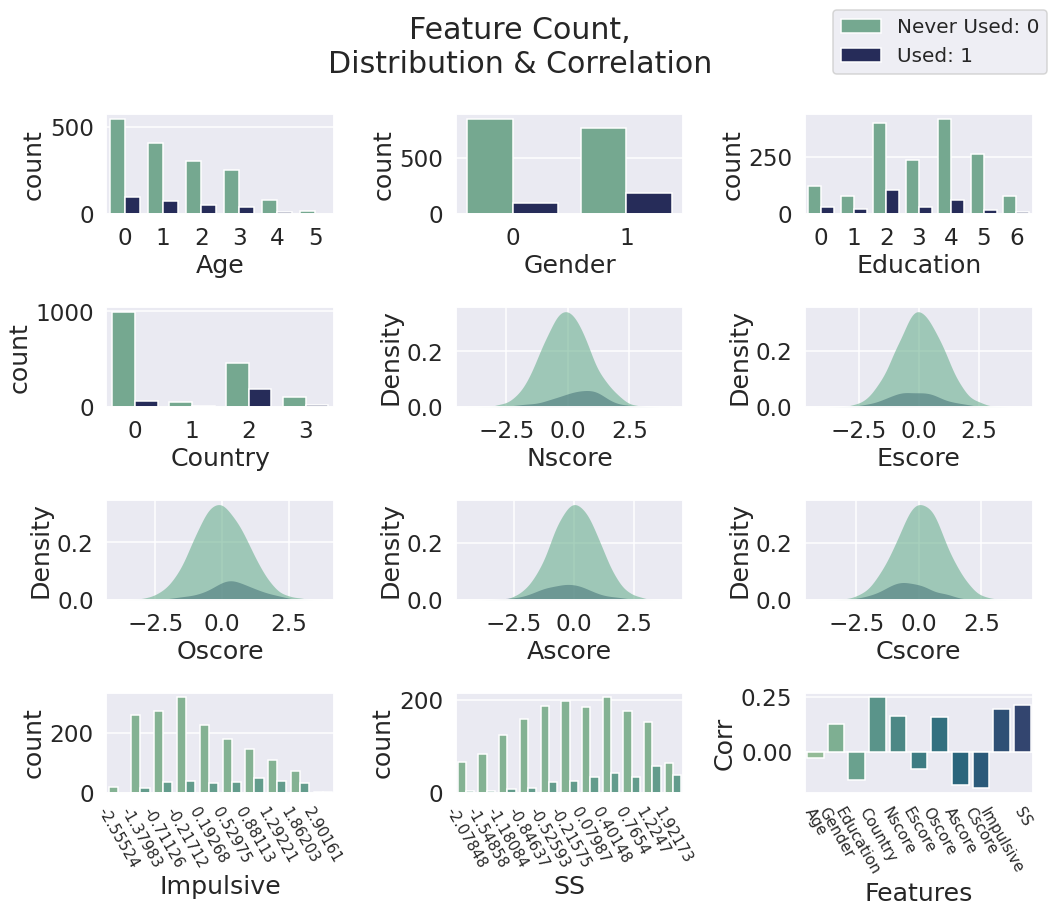

In [109]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(15,13))
title = """Feature Count,
Distribution & Correlation"""
fig.suptitle(title, fontsize=30)

sns.set_context("talk", font_scale=1.4)


g1 = sns.countplot(ax=axes[0, 0], data=df, x=df['Age'], hue=drug, palette=cont_col)
g1.get_legend().remove()
#cross_tab = pd.crosstab(index=df['Age'], columns=df[drug]).apply(lambda r: r/r.sum(), axis=1)
#g1 = cross_tab.plot(ax=axes[0,0], kind='bar')
#axes[0,0].set_ylabel('Percent')
axes[0,0].tick_params(axis='x', labelrotation=0)
#axes[0,0].tick_params(axis='x', labelrotation=90)
#cross_tab = pd.crosstab(index=df['Gender'], columns=df[drug]).apply(lambda r: r/r.sum(), axis=1)
#g2 = cross_tab.plot(ax=axes[0,1], kind='bar')
g2 = sns.countplot(ax=axes[0, 1], data=df, x=df['Gender'], hue=drug, palette=cont_col)
g2.get_legend().remove()
#axes[0,1].set_ylabel('Percent')
axes[0,1].tick_params(axis='x', labelrotation=0)
#cross_tab = pd.crosstab(index=df['Education'], columns=df[drug]).apply(lambda r: r/r.sum(), axis=1)
#g3 = cross_tab.plot(ax=axes[0,2], kind='bar')
g3 = sns.countplot(ax=axes[0, 2], data=df, x=df['Education'], hue=drug, palette=cont_col)
g3.get_legend().remove()
#axes[0,2].set_ylabel('Percent')
axes[0,2].tick_params(axis='x', labelrotation=0)
#cross_tab = pd.crosstab(index=df['Country'], columns=df[drug]).apply(lambda r: r/r.sum(), axis=1)
#g4 = cross_tab.plot(ax=axes[1,0], kind='bar')
g4 = sns.countplot(ax=axes[1, 0], data=df, x=df['Country'], hue=drug, palette=cont_col)
g4.get_legend().remove()
#axes[1,0].set_ylabel('Percent')
axes[1,0].tick_params(axis='x', labelrotation=0)
#cross_tab = pd.crosstab(index=df['Ethnicity'], columns=df[drug]).apply(lambda r: r/r.sum(), axis=1)
#cross_tab.plot(ax=axes[1,1], kind='bar')
#axes[1,1].set_ylabel('Percentage of Population')
#sns.countplot(ax=axes[1, 1], data=df, x=df['Ethnicity'], hue=drug)
#axes[1,1].tick_params(axis='x', labelrotation=90)
g5 = sns.kdeplot(ax=axes[1, 1], data=df, x=df['Nscore'], hue=drug, palette=cont_col,
                fill=True, alpha=0.6, linewidth=0)
g5.get_legend().remove()
g6 = sns.kdeplot(ax=axes[1, 2], data=df, x=df['Escore'], hue=drug, palette=cont_col,
                fill=True, alpha=0.6, linewidth=0)
g6.get_legend().remove()
g7 = sns.kdeplot(ax=axes[2, 0], data=df, x=df['Oscore'], hue=drug, palette=cont_col,
                fill=True, alpha=0.6, linewidth=0)
g7.get_legend().remove()
g8 = sns.kdeplot(ax=axes[2, 1], data=df, x=df['Ascore'], hue=drug, palette=cont_col,
                fill=True, alpha=0.6, linewidth=0)
g8.get_legend().remove()
g9 = sns.kdeplot(ax=axes[2, 2], data=df, x=df['Cscore'], hue=drug, palette=cont_col,
                fill=True, alpha=0.6, linewidth=0)
g9.get_legend().remove()
g10 = sns.countplot(ax=axes[3, 0], data=df, x=df['Impulsive'], hue=drug)
#g10 = sns.kdeplot(ax=axes[3, 0], data=df, x=df['Impulsive'], hue=drug, palette=cont_col,
#                 fill=True, alpha=0.6, linewidth=0)
g10.get_legend().remove()
axes[3,0].tick_params(axis='x', labelrotation=45)
axes[3,0].tick_params(axis='x', labelsize=15, labelrotation=-60)
g11 = sns.countplot(ax=axes[3, 1], data=df, x=df['SS'], hue=drug)
g11.get_legend().remove()
axes[3,1].tick_params(axis='x', labelrotation=45)
axes[3,1].tick_params(axis='x', labelsize=15, labelrotation=-60)

personality_features = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
g12 = sns.barplot(ax=axes[3,2], x=features, y=[df[feature].corr(df[drug]) for feature in features], palette=palette)
axes[3,2].tick_params(axis='x', labelsize=15, labelrotation=-60)
axes[3,2].set(xlabel="Features", ylabel="Corr")
      #,title ="Feat Vs Corr")


fig.legend([f'g{i}' for i in range(12)], labels=[f"Never Used: 0", f"Used: 1"],
           loc="upper right", fontsize=20)
  
# Adjusting the sub-plots
plt.subplots_adjust(right=0.9)


fig.tight_layout()

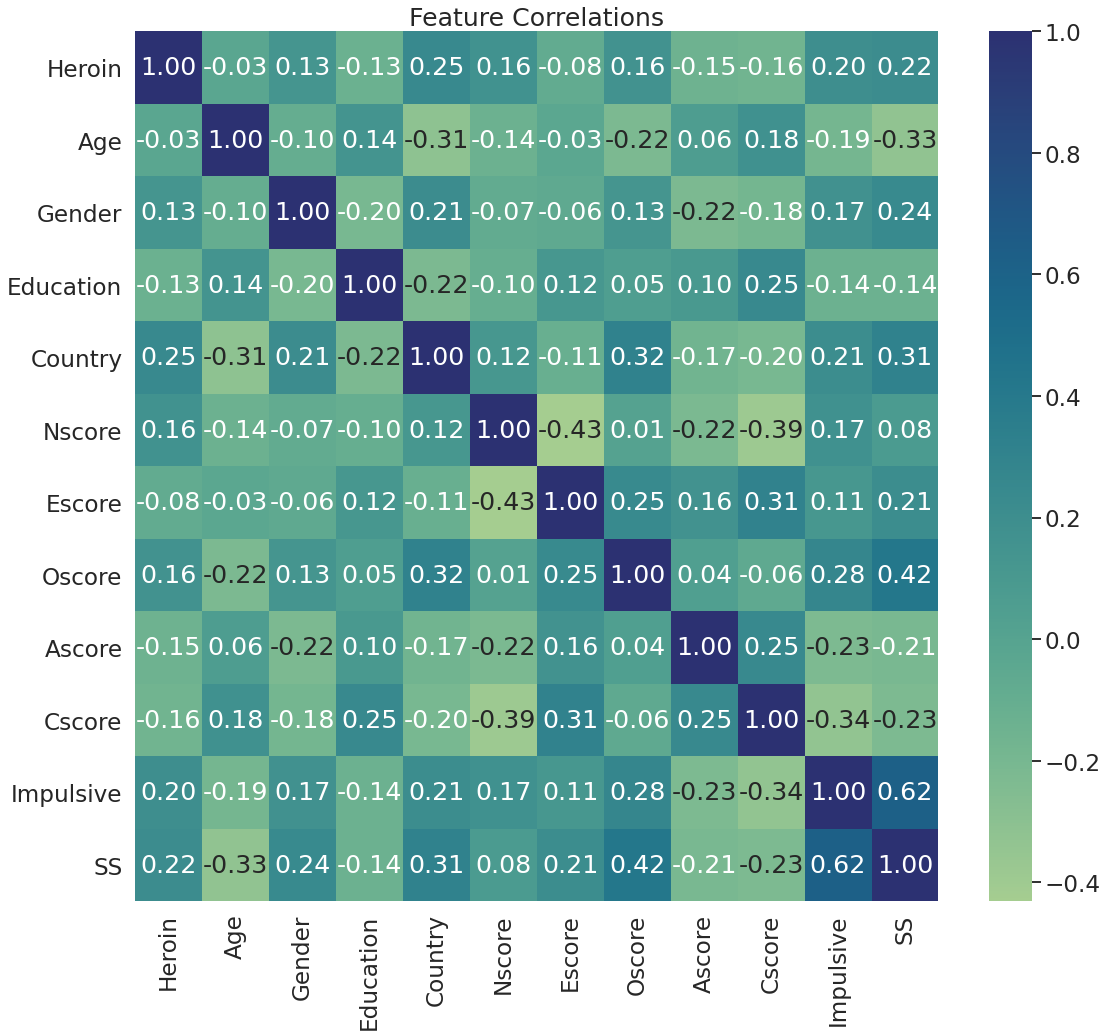

In [92]:
plt.figure(figsize=(18, 16))
g = sns.heatmap(df[[drug, 'Age', 'Gender', 'Education', 'Country', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].corr(),
                annot=True, fmt = ".2f", cmap = palette)
plt.title("Feature Correlations")
fig.tight_layout()

# Encoding

In [64]:
# Mean Encoding
#for feature in ['Age', 'Gender', 'Education', 'Country']:
#    mean_encoded_feature = df.groupby([feature])[drug].mean().to_dict()
#    df[feature] = df[feature].map(mean_encoded_feature)
    
# OneHot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Country']) # Nominal features

# Modeling

Algorithms to try:
- Naive Bayes
- Random Forest
- XGboost

## Train Test Split

In [65]:
X = df.copy()
y = X.pop(drug)
sum(y) / len(y)

0.14854111405835543

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(sum(y_test) / len(y_test))

(1508, 15)
(377, 15)
(1508,)
(377,)
0.14854111405835543


# Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score

## Categorical Naive Bayes

In [29]:
from math import sqrt
from statistics import stdev
categorical_features = ['Age', 'Education', 'Gender_0', 'Gender_1', 'Country_0', 'Country_1', 'Country_2', 'Country_3']
categorical_X_train = X_train[categorical_features]
categorical_X_test = X_test[categorical_features]
cnb = CategoricalNB()
cnb.fit(categorical_X_train, y_train)
y_pred_cnb_test = cnb.predict(categorical_X_test)
cnb_test_accuracy = accuracy_score(y_test, y_pred_cnb_test)
print('cnb_test_accuracy: ', cnb_test_accuracy)
y_pred_cnb_train = cnb.predict(categorical_X_train)
cnb_train_accuracy = accuracy_score(y_train, y_pred_cnb_train)
print('cnb_train_accuracy: ', cnb_train_accuracy)
cnb_conf_mat = pd.crosstab(y_test, y_pred_cnb_test, rownames=['Actual'], colnames=['Predicted'])
# Cross Validation
cnb_cv_scores = cross_val_score(cnb, X[categorical_features], y, cv=5)
cnb_cv_SE = (1/sqrt(len(cnb_cv_scores))) * stdev(cnb_cv_scores)
print("cnb_mean_cv: ", np.mean(cnb_cv_scores))
print("cnb cv SE: ", cnb_cv_SE)

cnb_test_accuracy:  0.7931034482758621
cnb_train_accuracy:  0.7824933687002652
cnb_mean_cv:  0.7681697612732096
cnb cv SE:  0.038020891137190996


## Gaussian Naive Bayes

In [30]:
normal_features = ['Nscore', 'Escore', 'Oscore', 'Cscore', 'Ascore', 'SS']
normal_X_train = X_train[normal_features]
normal_X_test = X_test[normal_features]
gnb = GaussianNB()
gnb.fit(normal_X_train, y_train)
y_pred_gnb_test = gnb.predict(normal_X_test)
count_misclassified_test = (y_test != y_pred_gnb_test).sum()
gnb_test_accuracy = accuracy_score(y_test, y_pred_gnb_test)
print('gnb_test_accuracy: {:.2f}'.format(gnb_test_accuracy))
y_pred_gnb_train = gnb.predict(normal_X_train)
#count_misclassified_train = (y_train != y_pred_gnb_train).sum()
#print('Misclassified training samples: {} out of {}'.format(count_misclassified_train, len(y_train)))
gnb_train_accuracy = accuracy_score(y_train, y_pred_gnb_train)
print('gnb_train_accuracy: {:.2f}'.format(gnb_train_accuracy))
gnb_conf_mat = pd.crosstab(y_test, y_pred_gnb_test, rownames=['Actual'], colnames=['Predicted'])
# Cross Validation
gnb_cv_scores = cross_val_score(gnb, X[normal_features], y, cv=5)
gnb_cv_SE = (1/sqrt(len(gnb_cv_scores))) * stdev(gnb_cv_scores)
print("gnb_mean_cv: ", np.mean(gnb_cv_scores))
print("gnb cv SE: ", gnb_cv_SE)

gnb_test_accuracy: 0.84
gnb_train_accuracy: 0.84
gnb_mean_cv:  0.8259946949602123
gnb cv SE:  0.012143791132370923


# XGBoost

https://medium.com/@ankitnitjsr13/math-behind-decision-tree-algorithm-2aa398561d6d

In [31]:
import xgboost as xgb_model
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV # For cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
xgb = xgb_model.XGBClassifier( # trying with random parameters
    random_state=5,
    learning_rate=0.01,
    n_estimators=10,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=1,
    objective = 'binary:logistic',
    eval_metric = 'error',
    scale_pos_weight=1,
    use_label_encoder=False,
    seed=27) 
                                    
## Accuracy: 0.854111 on test and 0.85853227 on training
#xgb = xgb_model.XGBClassifier(objective='binary:logistic', seed=27,
                              #use_label_encoder=False,
                             #eval_metric='error')

xgb.fit(X_train,
        y_train,
        verbose=True,
        early_stopping_rounds=10,
        eval_metric='error',
        eval_set=[(X_test, y_test)])

print("XGBoost Performance")
print(">" * 30)
xgb_test_accuracy = xgb.score(X_test,y_test)
xgb_train_accuracy = xgb.score(X_train,y_train)
print(f"XGBoost accuracy on test data: {xgb_test_accuracy}")
print(f"XGBoost accuracy on training data: {xgb_train_accuracy}")


[0]	validation_0-error:0.15650
[1]	validation_0-error:0.14589
[2]	validation_0-error:0.15119
[3]	validation_0-error:0.14854
[4]	validation_0-error:0.14324
[5]	validation_0-error:0.14324
[6]	validation_0-error:0.14589
[7]	validation_0-error:0.14324
[8]	validation_0-error:0.14324
[9]	validation_0-error:0.14058
XGBoost Performance
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
XGBoost accuracy on test data: 0.8594164456233422
XGBoost accuracy on training data: 0.879973474801061


## Optimizing XGBoost Parameters with GridSearchCV

In [32]:
y.value_counts()[1] / y.value_counts()[0]  # scale_pos_weight for imbalanced data

0.17445482866043613

In [33]:
## First Round
#param_grid = {
    #'max_depth': [3, 4, 5],
    #'learning_rate': [0.1, 0.01, 0.05],
    #'gamma': [0, 0.25, 1.0],
    #'reg_lambda': [0, 1.0, 10.0],
    #'scale_pos_weight': [1, 3, 6] # sum(negative classes) / sum(positive classes)
#}

## FIRST ITERATION: gs.best_estimator_ ##
#XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              #colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              #gamma=1.0, gpu_id=-1, importance_type='gain',
              #interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              #max_depth=5, min_child_weight=1, missing=nan,
              #monotone_constraints='()', n_estimators=100, n_jobs=8,
              #num_parallel_tree=1, random_state=27, reg_alpha=0,
              #reg_lambda=10.0, scale_pos_weight=1, seed=27, subsample=1,
              #tree_method='exact', use_label_encoder=False,
              #validate_parameters=1, verbosity=None)

            
param_grid = {
    'max_depth': [5, 8, 15],
    'learning_rate': [0.01, 0.0075, 0.005],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [10.0, 12.0, 15.0],
    'scale_pos_weight': [0, 0.2, 1] # sum(negative classes) / sum(positive classes)
}
            
#gs = GridSearchCV(xgb, param_grid=param_grid, scoring= 'accuracy')
#gs.fit(X_train, y_train)
#search_accuracy = gs.best_score_
#print("GridSearchCV Accuracy: ", search_accuracy)

In [34]:
#gs.best_estimator_ 

## Final XGBoost Model after parameter Tuning

In [35]:
xgb = xgb_model.XGBClassifier(eval_metric='error',
                              gamma=1.0, 
                              learning_rate=0.01,
                              max_delta_step=0,
                              max_depth=5,
                              n_estimators=8, # stops after 19
                              reg_lambda=10.0,
                              scale_pos_weight=1,
                              seed=27,
                              subsample=1,
                              use_label_encoder=False)

xgb.fit(X_train,
        y_train,
        verbose=True,
        early_stopping_rounds=10,
        eval_metric='error',
        eval_set=[(X_test, y_test)])

print("Tuned Parameter XGBoost Performance")
print(">" * 30)
xgb_test_accuracy = xgb.score(X_test,y_test)
xgb_train_accuracy = xgb.score(X_train,y_train)
print(f"XGBoost accuracy on test data: {xgb_test_accuracy}")
print(f"XGBoost accuracy on training data: {xgb_train_accuracy}")

xgb_conf_mat = pd.crosstab(y_test, xgb.predict(X_test), rownames=['Actual'], colnames=['Predicted'])

# Cross Validation
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5)
xgb_cv_SE = (1/sqrt(len(xgb_cv_scores))) * stdev(xgb_cv_scores)
print("xgb_mean_cv: ", np.mean(xgb_cv_scores))
print("xgb cv SE: ", xgb_cv_SE)

[0]	validation_0-error:0.14324
[1]	validation_0-error:0.14324
[2]	validation_0-error:0.14324
[3]	validation_0-error:0.14324
[4]	validation_0-error:0.14324
[5]	validation_0-error:0.14324
[6]	validation_0-error:0.14324
[7]	validation_0-error:0.14324
Tuned Parameter XGBoost Performance
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
XGBoost accuracy on test data: 0.8567639257294429
XGBoost accuracy on training data: 0.863395225464191
xgb_mean_cv:  0.8323607427055704
xgb cv SE:  0.01055689588442037


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=10, min_samples_split=2, max_depth=5)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
print("Random Forest Performance")
print(">" * 30)
rf_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
rf_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('rf_test_accuracy: ', rf_test_accuracy)
print('rf_train_accuracy', rf_train_accuracy)

rf_conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# Cross Validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
rf_cv_SE = (1/sqrt(len(rf_cv_scores))) * stdev(rf_cv_scores)
print("rf_mean_cv: ", np.mean(rf_cv_scores))
print("rf_cv_SE: ", rf_cv_SE)

Random Forest Performance
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
rf_test_accuracy:  0.8514588859416445
rf_train_accuracy 0.853448275862069
rf_mean_cv:  0.8525198938992041
rf_cv_SE:  0.0021549173487097947


## Visualizing a tree

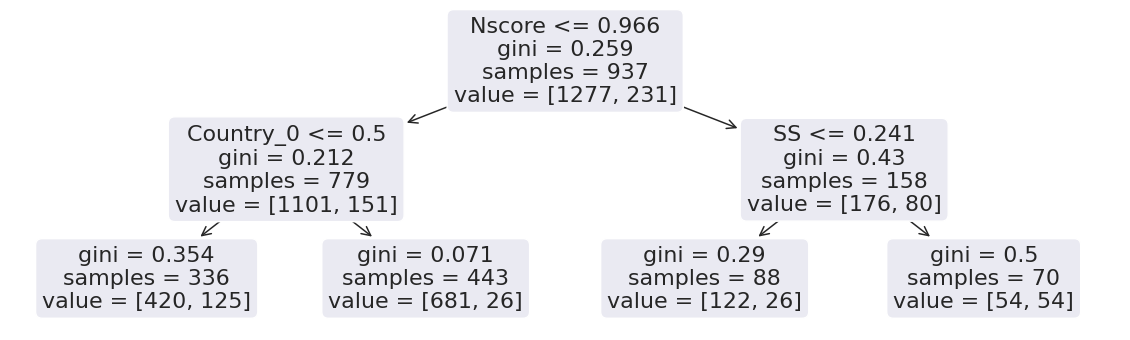

In [37]:
from sklearn import tree

rf_tree = RandomForestClassifier(n_estimators=10, min_samples_leaf=10, min_samples_split=2, max_depth=2)
rf_tree.fit(X_train,y_train)
rf_tree.estimators_[0].tree_.max_depth
plt.figure(figsize=(20,6))
_ = tree.plot_tree(rf_tree.estimators_[0], feature_names=X.columns, filled=False, rounded=True)
              

## Hard Voting Ensemble

In [38]:
cnb_pred = cnb.predict(categorical_X_test)
gnb_pred = gnb.predict(normal_X_test)
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)

one_votes = 0
zero_votes = 0
ensemble_y_pred = []
for i in range(len(cnb_pred)):
    if cnb_pred[i] == 1:
        one_votes += 1
    else:
        zero_votes += 1
    if gnb_pred[i] == 1:
        one_votes += 1
    else:
        zero_votes += 1
    if xgb_pred[i] == 1:
        one_votes += 1
    else:
        zero_votes += 1
    if rf_pred[i] == 1:
        one_votes += 1
    else:
        zero_votes += 1
    
    if one_votes >= zero_votes:
        ensemble_y_pred.append(1)
    else:
        ensemble_y_pred.append(0)
    
ensemble_test_accuracy = accuracy_score(y_test, ensemble_y_pred)
print('Hard Voting Ensemble Accuracy: ', ensemble_test_accuracy)

Hard Voting Ensemble Accuracy:  0.8541114058355438


# Summary of Results

In [39]:
data = {'Model Name': ['CategoricalNB', 'GaussianNB', 'XGBoost', 'Random Forest'],
        'Training Accuracy': [cnb_train_accuracy, gnb_train_accuracy, xgb_train_accuracy, rf_train_accuracy],
        'Test Accuracy' : [cnb_test_accuracy, gnb_test_accuracy, xgb_test_accuracy, rf_test_accuracy],
        'CV Mean Accuracy': [np.mean(cnb_cv_scores), np.mean(gnb_cv_scores), np.mean(xgb_cv_scores), np.mean(rf_cv_scores)],
        'CV SE': [cnb_cv_SE, gnb_cv_SE, xgb_cv_SE, rf_cv_SE]
        }

df = pd.DataFrame (data, columns = data.keys())
df

,Model Name,Training Accuracy,Test Accuracy,CV Mean Accuracy,CV SE
0,CategoricalNB,0.782493,0.793103,0.768170,0.038021
1,GaussianNB,0.835544,0.838196,0.825995,0.012144
2,XGBoost,0.863395,0.856764,0.832361,0.010557
3,Random Forest,0.853448,0.851459,0.852520,0.002155


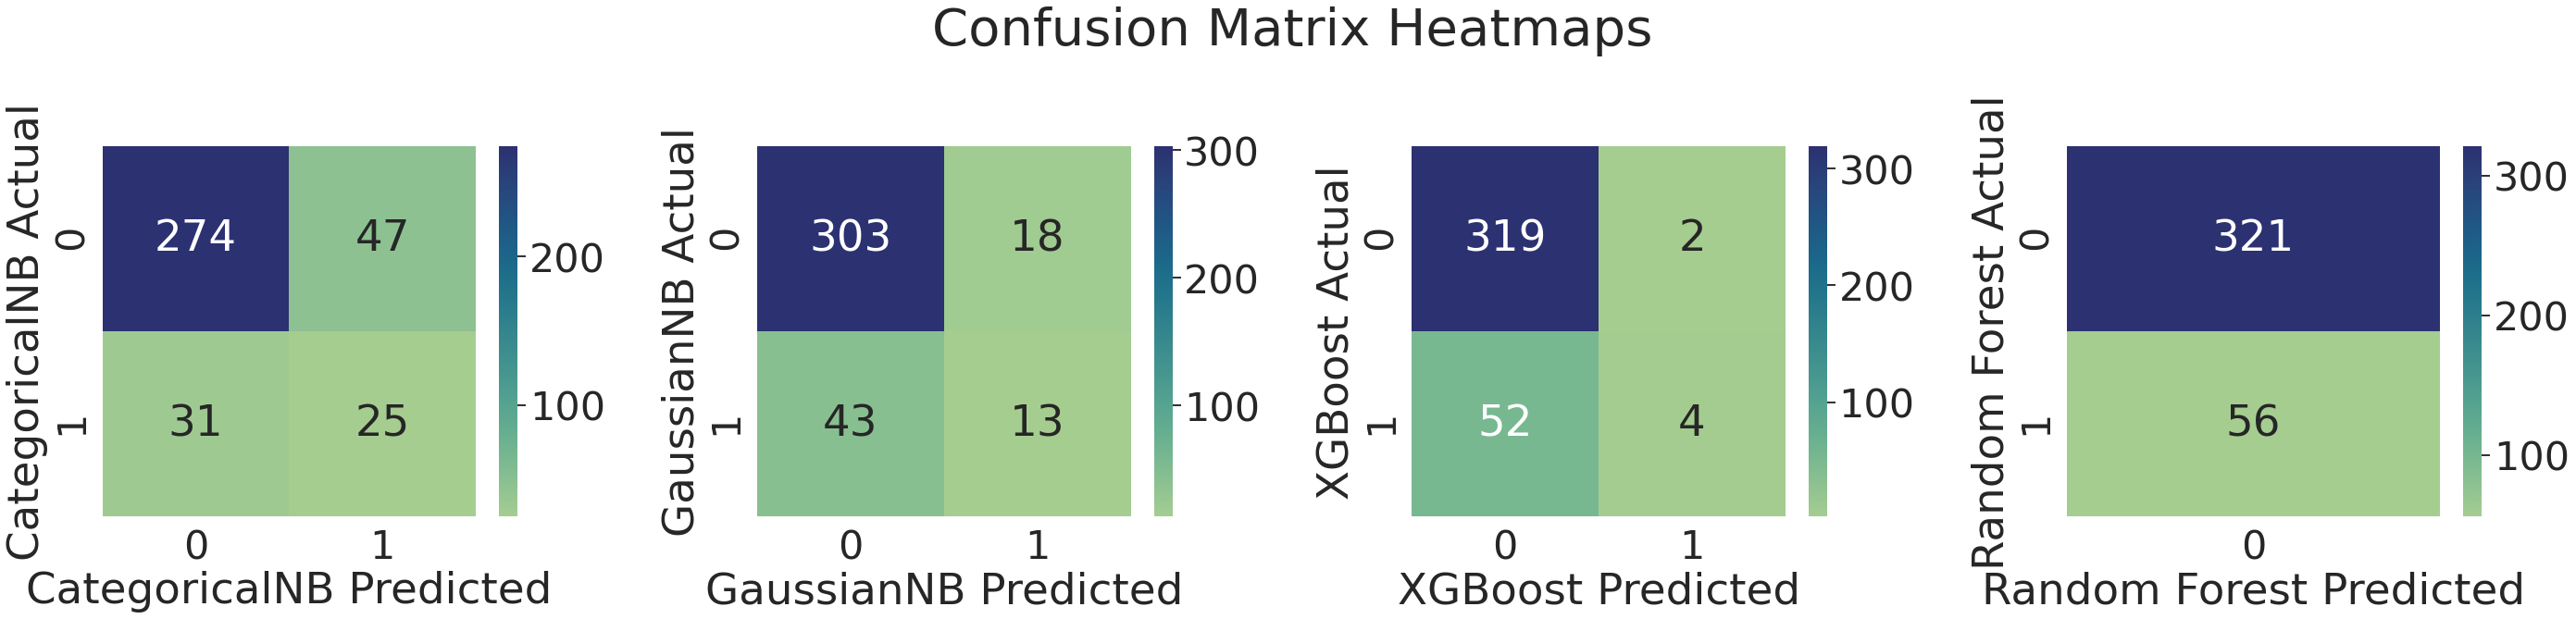

In [40]:
sns.set_context("talk", font_scale=2.6)
fig, axes = plt.subplots(1, 4, sharex=False, figsize=(40,10))
fig.suptitle('Confusion Matrix Heatmaps')
cnb_heatmap = sns.heatmap(ax=axes[0], data=cnb_conf_mat, annot=True, cmap=palette, fmt='g')
axes[0].set(xlabel="CategoricalNB Predicted", ylabel="CategoricalNB Actual")
gnb_heatmap = sns.heatmap(ax=axes[1], data=gnb_conf_mat, annot=True, cmap=palette, fmt='g')
axes[1].set(xlabel="GaussianNB Predicted", ylabel="GaussianNB Actual")
xgb_heatmap = sns.heatmap(ax=axes[2], data=xgb_conf_mat, annot=True, cmap=palette, fmt='g')
axes[2].set(xlabel="XGBoost Predicted", ylabel="XGBoost Actual")
rf_heatmap = sns.heatmap(ax=axes[3], data=rf_conf_mat, annot=True, cmap=palette, fmt='g')
axes[3].set(xlabel="Random Forest Predicted", ylabel="Random Forest Actual")
fig.tight_layout()

### Conlcusion

So clearly the XGBoost and Random Forest give the best results, with XGBoost having
slightly better accuracy on the test data. However XGBoost is also slightly more overfitted when comparing with results on the training data. In conclusion either XGBoost or Random Forest would be good models to use.